<a href="https://colab.research.google.com/github/johnny19436/ML-learn/blob/main/ML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

Each pixel intensity is represented as a byte (0 to 255):

In [23]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [24]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
X_test.shape

(10000, 28, 28)

Split the full training set into a validation set and a (smaller) training set.Also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [28]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

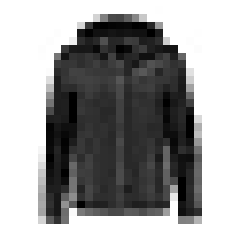

In [29]:
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

Corresponding class names

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [31]:
class_names[y_train[0]]

'Coat'

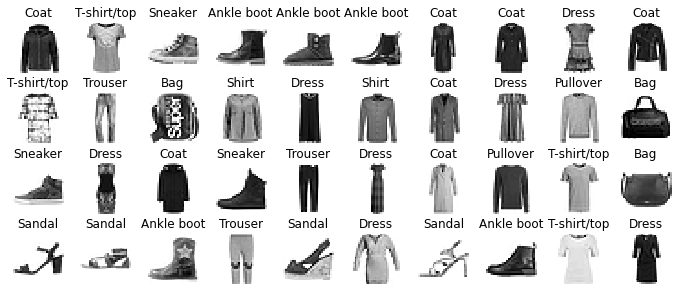

In [49]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show()

P.295
Classification loss to choose

In [86]:
model = keras.models.Sequential([
    #keras.layers.Reshape((-1,),input_shape=(28,28)),#Flatten inputs to 1D
    keras.layers.Flatten(input_shape=[28, 28]),#reshape(-1,1)=>Flatten inputs to 1D
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [77]:
model.layers

Param = ( input_shape + 1(bias) ) * output_shape

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


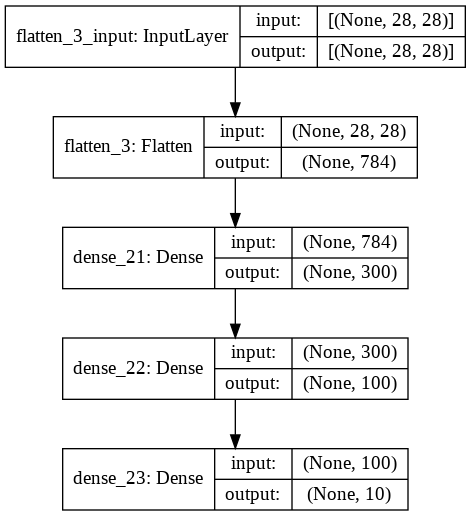

In [87]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [80]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [81]:
weights

array([[-0.00280226,  0.00376392,  0.05520308, ...,  0.00405539,
        -0.01547995, -0.03835016],
       [ 0.03209374, -0.06303272,  0.02721448, ...,  0.02001642,
         0.01207648, -0.05951412],
       [ 0.04878334, -0.01992021, -0.05478077, ..., -0.06241732,
        -0.01821018, -0.03565376],
       ...,
       [-0.05848433,  0.00276228,  0.02715843, ...,  0.02192697,
         0.06705531, -0.07084912],
       [ 0.02110805,  0.01213979, -0.0225896 , ...,  0.02255583,
        -0.02159758, -0.01353742],
       [ 0.05913101,  0.02143565, -0.00298906, ..., -0.00467227,
        -0.02667867,  0.05955039]], dtype=float32)

In [82]:
weights.shape

(784, 300)

In [83]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(optimizer="sgd",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])